# Mining Big Data - Assignment 3b
Student Names and Numbers:

Ebubekir Pulat - a1833363

Chunyu Zhang  - a1751743

Xingyuan Zhang – a1808020

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


def frequent_patterns(file_path):
    data = pd.read_csv(file_path)
    # Group the dataset with member number and date, to get the items in same basket
    transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()
    trans_encoder = TransactionEncoder()
    arr = trans_encoder.fit(transactions).transform(transactions)
    df = pd.DataFrame(arr, columns = trans_encoder.columns_)

    frequent_itemsets = fpgrowth(df, min_support = 0.001, use_colnames = True)

    return frequent_itemsets

In [2]:
# My teammate needs the output includes frequent itemsest, alongside their interest in a matrix of vectors
def get_martrix(frequent_itemsets):
    output_matrix = [[list(itemsets), support] for itemsets, support in zip(frequent_itemsets['itemsets'], frequent_itemsets['support'])]
    # Get the sorted list, so that it will be easy to analyze
    output_matrix = sorted(output_matrix, key = lambda x: x[1], reverse = True)
    return output_matrix

In [3]:
def get_rules(frequent_itemsets):
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
    rules['interest'] = rules['confidence'] - rules['consequent support']
    return rules

In [4]:
def get_conf_supp(frequent_itemsets, rules):
  results = dict()
  for index, rule in rules.iterrows():
    (item1,) = rule['antecedents']
    (item2,) = rule['consequents']
    itemsets = item1 + ', ' + item2
    if (item2 + ', ' + item1) not in results.keys():
      results[itemsets] = [rule['support'], rule['confidence']]
    else:
      if results[((item2 + ', ' + item1))][0] < rule['confidence']:
        results[itemsets] = [rule['support'], rule['confidence']]
        del results[((item2 + ', ' + item1))]
      else:
        continue
  results = sorted(results.items(), key=lambda item: item[1][0], reverse = True)
  return results

In [5]:
def get_interest(rules):
    interest = []
    for index, rule in rules.iterrows():
        (item1,) = rule['antecedents']
        (item2,) = rule['consequents']
        itemsets = [item1, item2]
        interest.append([itemsets, rule["interest"]])
    return interest

In [6]:
# Use this function to print the frequent
def print_frequent(results):
    for item in results:
      print(f'patterns:[{item[0]}], support: {item[1][0]}, confidence: {item[1][1]}')

In [7]:
file_path = 'Groceries data train.csv'

# Print the results after the fp-growth
frequent_itemsets = frequent_patterns(file_path)
print(frequent_itemsets)

# Print the results
rules = get_rules(frequent_itemsets)
results = get_conf_supp(frequent_itemsets, rules)
print("\nThe results: ")
print_frequent(results)

interest = get_interest(rules)

      support                   itemsets
0    0.064312                   (yogurt)
1    0.045249                  (sausage)
2    0.039781                   (pastry)
3    0.034530              (canned beer)
4    0.012373          (misc. beverages)
..        ...                        ...
392  0.001511      (whole milk, waffles)
393  0.001367          (oil, whole milk)
394  0.001007                (soda, oil)
395  0.001007  (whole milk, hard cheese)
396  0.001079  (rolls/buns, hard cheese)

[397 rows x 2 columns]

The results: 
patterns:[rolls/buns, whole milk], support: 0.007913099776994462, confidence: 0.09474590869939709
patterns:[other vegetables, whole milk], support: 0.006977915257895115, confidence: 0.07519379844961241
patterns:[yogurt, whole milk], support: 0.006546291633695417, confidence: 0.10178970917225949
patterns:[whole milk, soda], support: 0.00597079346809582, confidence: 0.05057891529555149
patterns:[other vegetables, soda], support: 0.005467232573196173, confidence: 0.05

In [8]:
def get_5_output(file_path):
  frequent_itemsets = frequent_patterns(file_path)
  rules = get_rules(frequent_itemsets)
  results = get_conf_supp(frequent_itemsets, rules)
  print_frequent(results[:5])
  return results

In [9]:
# for Trainning dataset
print('5 patterns of train dataset:')
train_results = get_5_output('Groceries data train.csv')


# For test dataset
print('\n5 patterns of test dataset:')
test_results = get_5_output('Groceries data test.csv')

5 patterns of train dataset:
patterns:[rolls/buns, whole milk], support: 0.007913099776994462, confidence: 0.09474590869939709
patterns:[other vegetables, whole milk], support: 0.006977915257895115, confidence: 0.07519379844961241
patterns:[yogurt, whole milk], support: 0.006546291633695417, confidence: 0.10178970917225949
patterns:[whole milk, soda], support: 0.00597079346809582, confidence: 0.05057891529555149
patterns:[other vegetables, soda], support: 0.005467232573196173, confidence: 0.05891472868217054

5 patterns of test dataset:
patterns:[other vegetables, whole milk], support: 0.0033055967172005017, confidence: 0.0506108202443281
patterns:[tropical fruit, whole milk], support: 0.0020517496865382423, confidence: 0.05187319884726225
patterns:[bottled water, other vegetables], support: 0.0015958053117519663, confidence: 0.052631578947368425
patterns:[pastry, whole milk], support: 0.0013678331243588283, confidence: 0.05309734513274337
patterns:[beef, whole milk], support: 0.001139

In [10]:
df = pd.DataFrame({
    'Pattern': [],
    'Support': [],
    'Confidence': []
})
for item in test_results:
  new_row = pd.DataFrame({
    'Pattern': [item[0]],
    'Support': [item[1][0]],
    'Confidence': [item[1][1]]})
  df = pd.concat([df, new_row], ignore_index=True)

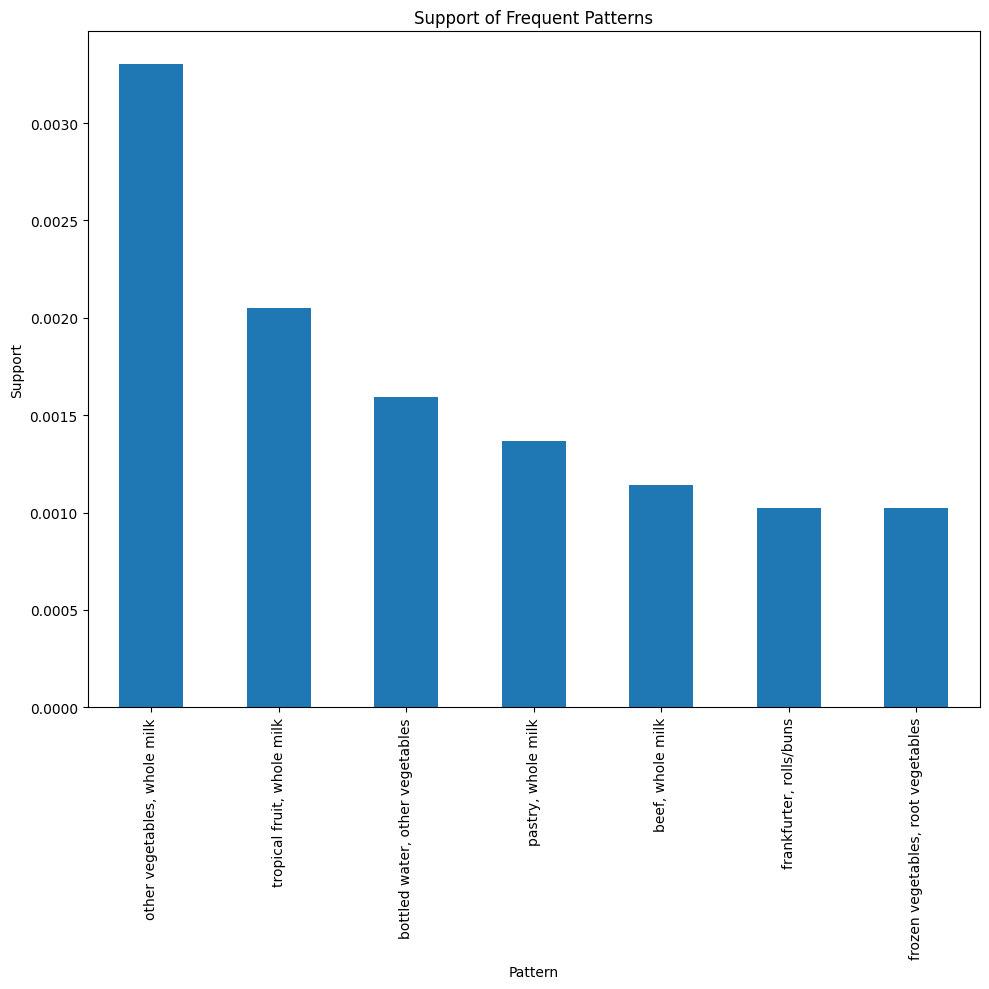

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df.plot.bar(x='Pattern', y='Support', ax=ax, legend=False)
ax.set_ylabel('Support')
ax.set_title('Support of Frequent Patterns')
plt.tight_layout()
plt.show()

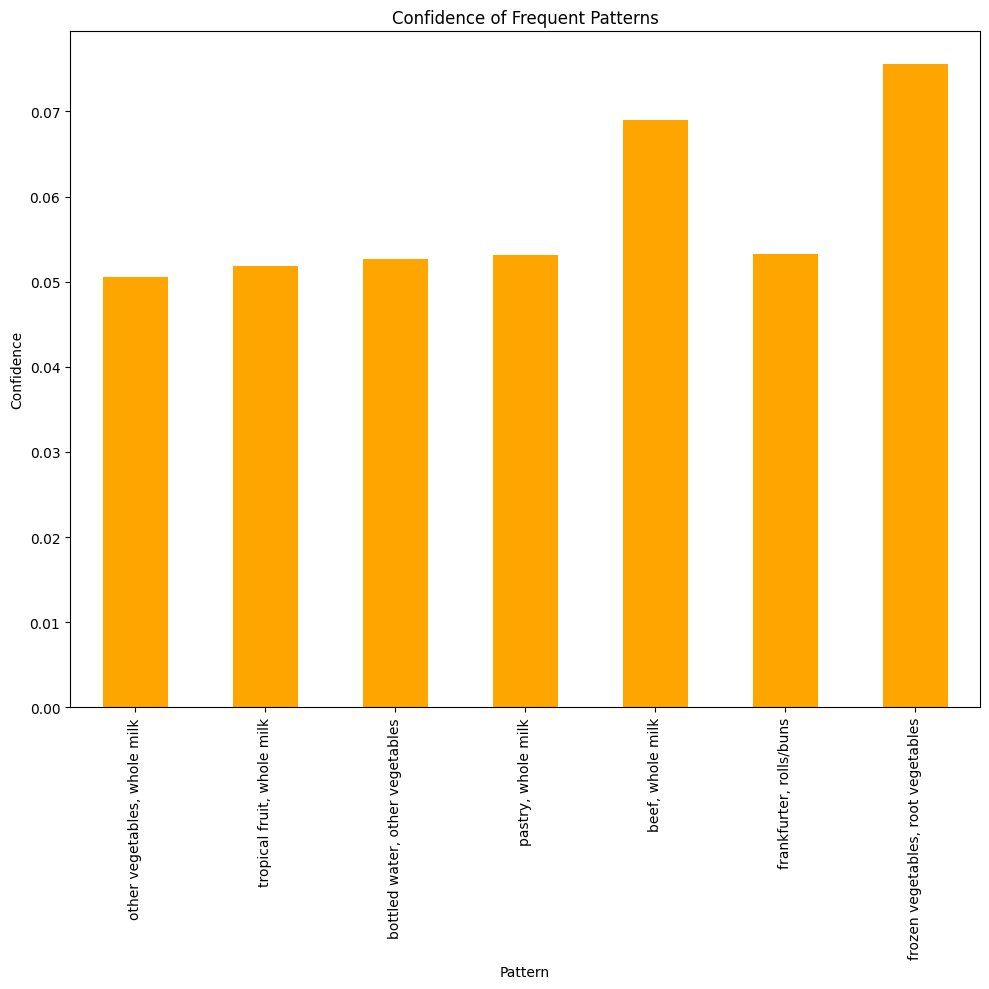

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df.plot.bar(x='Pattern', y='Confidence', ax=ax, color='orange', legend=False)
ax.set_ylabel('Confidence')
ax.set_title('Confidence of Frequent Patterns')
plt.tight_layout()
plt.show()

In [13]:
# Week 11 Workshop Solutions were used in the development of the code in the rest of this file (up until the Reference List):
# https://myuni.adelaide.edu.au/courses/91968/files/14319268?wrap=1

In [14]:
import numpy as np

# Reading in Training and Test Datasets
train_set_df = pd.read_csv('Groceries data train.csv')
test_set_df = pd.read_csv('Groceries data test.csv')

train_rows, test_cols = np.shape(train_set_df)
test_rows, test_cols = np.shape(test_set_df)

print("Train:", np.shape(train_set_df))
print("Test:", np.shape(test_set_df))

Train: (27000, 7)
Test: (11765, 7)


In [15]:
train_set = np.array(train_set_df)
test_set = np.array(test_set_df)

In [16]:
print(train_set[0:3])

[[3021 '30/01/2015' 'frankfurter' 2015 1 30 4]
 [1292 '24/10/2015' 'pork' 2015 10 24 5]
 [4206 '4/04/2014' 'root vegetables' 2014 4 4 4]]


In [17]:
print(test_set[0:3])

[[3481 '8/03/2015' 'candy' 2015 3 8 6]
 [1254 '19/04/2015' 'white wine' 2015 4 19 6]
 [2835 '28/01/2014' 'domestic eggs' 2014 1 28 1]]


In [18]:
train_set = np.array([[row[0], row[2]] for row in train_set])
test_set = np.array([[row[0], row[2]] for row in test_set])

In [19]:
train_set = train_set[train_set[:, 0].argsort()]        # this part is (based on) from [1]
test_set = test_set[test_set[:, 0].argsort()]           # this part is (based on) from [1]

In [20]:
ids = []
items = []

for i in range(train_rows):
    if train_set[i][0] not in ids:
        ids.append(train_set[i][0])

    if train_set[i][1] not in items:
        items.append(train_set[i][1])

for i in range(test_rows):
    if test_set[i][0] not in ids:
        ids.append(test_set[i][0])

    if test_set[i][1] not in items:
        items.append(test_set[i][1])

user_count = len(ids)
item_count = len(items)

In [21]:
new_id_dict = {}
new_id_reverse_dict = {}

for i in range(len(ids)):
    new_id_dict[ids[i]] = i
    new_id_reverse_dict[i] = ids[i]

In [22]:
item_id_dict = {}
item_id_reverse_dict = {}

for i in range(item_count):
    item_id_dict[items[i]] = i
    item_id_reverse_dict[i] = items[i]

In [23]:
for i in range(train_rows):
    train_set[i][0] = new_id_dict[train_set[i][0]]
    train_set[i][1] = item_id_dict[train_set[i][1]]

for i in range(test_rows):
    test_set[i][0] = new_id_dict[test_set[i][0]]
    test_set[i][1] = item_id_dict[test_set[i][1]]

In [24]:
import copy

user_item_matrix = [[0 for i in range(item_count)] for j in range(user_count)]
user_item_matrix = np.array(user_item_matrix)

test_user_item_matrix = copy.deepcopy(user_item_matrix)                 # this part is (based on) from [2]
collab_filter_user_item_matrix = copy.deepcopy(user_item_matrix)        # this part is (based on) from [2]

In [25]:
for i in range(train_rows):
    user = int(train_set[i][0])
    item = int(train_set[i][1])
    user_item_matrix[user][item] += 1

In [26]:
alt_user_item_matrix = copy.deepcopy(user_item_matrix)      # this part is (based on) from [2]

In [27]:
for i in range(user_count):
    row_mean = np.mean(user_item_matrix[i])         # this part is (based on) from [3]
    for j in range(item_count):
        alt_user_item_matrix[i][j] -= row_mean

In [28]:
# Method used to calculate cosine similarity in below function based off information from [6] and [7]
def cosine_similarity(vec1, vec2):
    len1 = len(vec1)
    len2 = len(vec2)
    cos_sim = (np.dot(vec1, vec2)) / (len1 * len2)      # this part is (based on) from [4]
    return cos_sim

In [29]:
# Following function based on [8] (Week 11 Workshop Solutions)
def get_similarity_vec(user, item, user_item_matrix):
    similarity_vec = []
    for i in range(user_count):
        if i != user and user_item_matrix[i][item] != 0:
            cosine_sim = cosine_similarity(alt_user_item_matrix[user], alt_user_item_matrix[i])
            similarity_vec.append([cosine_sim, i])

    similarity_vec = sorted(similarity_vec, reverse=True)
    return similarity_vec

In [30]:
# [8] (Week 11 Workshop Solutions) assisted the development of the following function
def weighted_avg(user, item, n, original_u_i_matrix, modified_u_i_matrix):
    sim_vec = get_similarity_vec(user, item, modified_u_i_matrix)
    neighbours = []
    cos_sims = []

    n = min(n, len(sim_vec))
    for i in range(n):
        neighbours.append(sim_vec[i][1])
        cos_sims.append(sim_vec[i][0])

    if n == 0 or max(cos_sims) == 0:
        return 0

    weighted_sum = 0
    for i in range(n):
        original_item_count = original_u_i_matrix[neighbours[i]][item]
        cos_sim = cos_sims[i]
        weighted_sum += (cos_sim * original_item_count)

    weight_avg = weighted_sum / sum(cos_sims)
    return weight_avg

In [31]:
# Following function based on [8] (Week 11 Workshop Solutions)
def recommend(user, original_u_i_matrix, modified_u_i_matrix, top_recs=1, top_users=1000):
    recommendation_ratings = []

    for i in range(item_count):
        if original_u_i_matrix[user][i] == 0:
            recommendation_rating = weighted_avg(user, i, top_users, original_u_i_matrix, modified_u_i_matrix)
            if recommendation_rating == 0:
                continue
            recommendation_ratings.append([recommendation_rating, i])

    if len(recommendation_ratings) == 0:
        return 0

    recommendation_ratings = sorted(recommendation_ratings, reverse=True)
    return recommendation_ratings[:top_recs]

In [32]:
for i in range(test_rows):
    user = int(test_set[i][0])
    item = int(test_set[i][1])
    test_user_item_matrix[user][item] += 1

In [33]:
import math

# Formula for root mean squared error (RMSE) used to develop function below, derived from [9]
def RMSE(errors):
    rmse = 0
    for error in errors:
        error_squared = error * error
        rmse += error_squared

    rmse = rmse / len(errors)
    return math.sqrt(rmse)      # this part is (based on) from [5]

In [34]:
collab_filter_losses = []

# [8] (Week 11 Workshop Solutions) assisted the development of the code in this code cell
for i in range(user_count):
    recommendations = recommend(i, user_item_matrix, alt_user_item_matrix)
    if recommendations == 0:
        continue

    for j in range(len(recommendations)):
        recommended_item = recommendations[j][1]
        if user_item_matrix[i][recommended_item] == 0:
            collab_filter_user_item_matrix[i][recommended_item] = recommendations[j][0]
            loss = collab_filter_user_item_matrix[i][recommended_item] - test_user_item_matrix[i][recommended_item]
            collab_filter_losses.append(loss)

print("Root Mean Squared Error (RMSE) for Collaborative Filtering:", RMSE(collab_filter_losses))

Root Mean Squared Error (RMSE) for Collaborative Filtering: 2.353684314655411


In [35]:
freq_itemsets = interest

for i in range(len(freq_itemsets)):
    freq_itemset = freq_itemsets[i][0]
    for j in range(len(freq_itemset)):
        freq_itemset[j] = item_id_dict[freq_itemset[j]]

In [36]:
def get_itemset_relevance(user, freq_itemset, user_item_matrix):
    item_relevances = []
    items = freq_itemset[0]
    interest = freq_itemset[1]

    for i in range(len(items)):
        item = items[i]
        item_relevances.append(user_item_matrix[user][item] * interest)

    return sum(item_relevances)

In [37]:
pattern_recs_true = 0
pattern_recs_false = 0

for i in range(user_count):
    relevant_itemsets = []
    for j in range(item_count):
        for k in range(len(freq_itemsets)):
            if user_item_matrix[i][j] == 1 and j in freq_itemsets[k][0]:
                relevant_itemsets.append(freq_itemsets[k])

    if len(relevant_itemsets) == 0:
        continue

    itemset_relevances = []
    for j in range(len(relevant_itemsets)):
        itemset_relevances.append([get_itemset_relevance(i, relevant_itemsets[j], user_item_matrix), j])

    itemset_relevances = sorted(itemset_relevances, reverse=True)
    top_freq_itemset = relevant_itemsets[itemset_relevances[0][1]][0]

    print("\nRecommendations for User", new_id_reverse_dict[i])
    for j in range(len(top_freq_itemset)):
        if user_item_matrix[user][top_freq_itemset[j]] == 0 and test_user_item_matrix[user][top_freq_itemset[j]] >= 1:
            print(item_id_reverse_dict[top_freq_itemset[j]])
            pattern_recs_true += 1
        elif user_item_matrix[user][top_freq_itemset[j]] == 0:
            print(item_id_reverse_dict[top_freq_itemset[j]])
            pattern_recs_false += 1

pattern_recs_accuracy = pattern_recs_true / (pattern_recs_true + pattern_recs_false)
print("\nAccuracy of Recommendations Generated From Frequent Itemsets:", pattern_recs_accuracy)


Recommendations for User 1000
grapes

Recommendations for User 1001
processed cheese
rolls/buns

Recommendations for User 1002
ham
whole milk

Recommendations for User 1003
processed cheese
rolls/buns

Recommendations for User 1004
processed cheese
rolls/buns

Recommendations for User 1005
margarine

Recommendations for User 1006
processed cheese
rolls/buns

Recommendations for User 1008
UHT-milk
tropical fruit

Recommendations for User 1009
napkins
pastry

Recommendations for User 1010
UHT-milk
tropical fruit

Recommendations for User 1011
processed cheese
rolls/buns

Recommendations for User 1012
processed cheese
rolls/buns

Recommendations for User 1013
ham
whole milk

Recommendations for User 1014
ham
whole milk

Recommendations for User 1015
ham
whole milk

Recommendations for User 1016
processed cheese
rolls/buns

Recommendations for User 1017
processed cheese
rolls/buns

Recommendations for User 1018
curd
tropical fruit

Recommendations for User 1019
hamburger meat
yogurt

Reco

Reference List

1. https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
2. https://stackoverflow.com/questions/2612802/how-do-i-clone-a-list-so-that-it-doesnt-change-unexpectedly-after-assignment
3. https://numpy.org/doc/stable/reference/generated/numpy.mean.html
4. https://numpy.org/doc/stable/reference/generated/numpy.dot.html
5. https://www.w3schools.com/python/ref_math_sqrt.asp
6. https://myuni.adelaide.edu.au/courses/91968/pages/module-8-online-learning?module_item_id=3274637
7. https://en.wikipedia.org/wiki/Cosine_similarity#:~:text=In%20data%20analysis%2C%20cosine%20similarity,the%20product%20of%20their%20lengths.
8. https://myuni.adelaide.edu.au/courses/91968/files/14319268?wrap=1
9. https://docs.oracle.com/en/cloud/saas/planning-budgeting-cloud/pfusu/insights_metrics_RMSE.html

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('Groceries data train.csv')
data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


In [40]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek
basket = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
basket['itemDescription'] = basket['itemDescription'].apply(lambda x: ', '.join(x))
# basket_sets = basket['itemDescription'].str.get_dummies(sep=', ')
basket.head(10)

,Member_number,Date,itemDescription
0,1000,2014-06-24,pastry
1,1000,2015-03-15,"sausage, yogurt"
2,1000,2015-05-27,"soda, pickled vegetables"
3,1000,2015-07-24,"misc. beverages, canned beer"
4,1000,2015-11-25,sausage
5,1001,2014-07-02,"rolls/buns, whole milk, sausage"
6,1001,2014-12-12,"soda, whole milk"
7,1001,2015-01-20,"soda, whipped/sour cream"
8,1001,2015-02-05,"frankfurter, curd"
9,1001,2015-04-14,"white bread, beef"


C:\Users\ebube\AppData\Local\Temp\ipykernel_8092\419175320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Member_number', x='count', data=sales_count, palette='viridis')


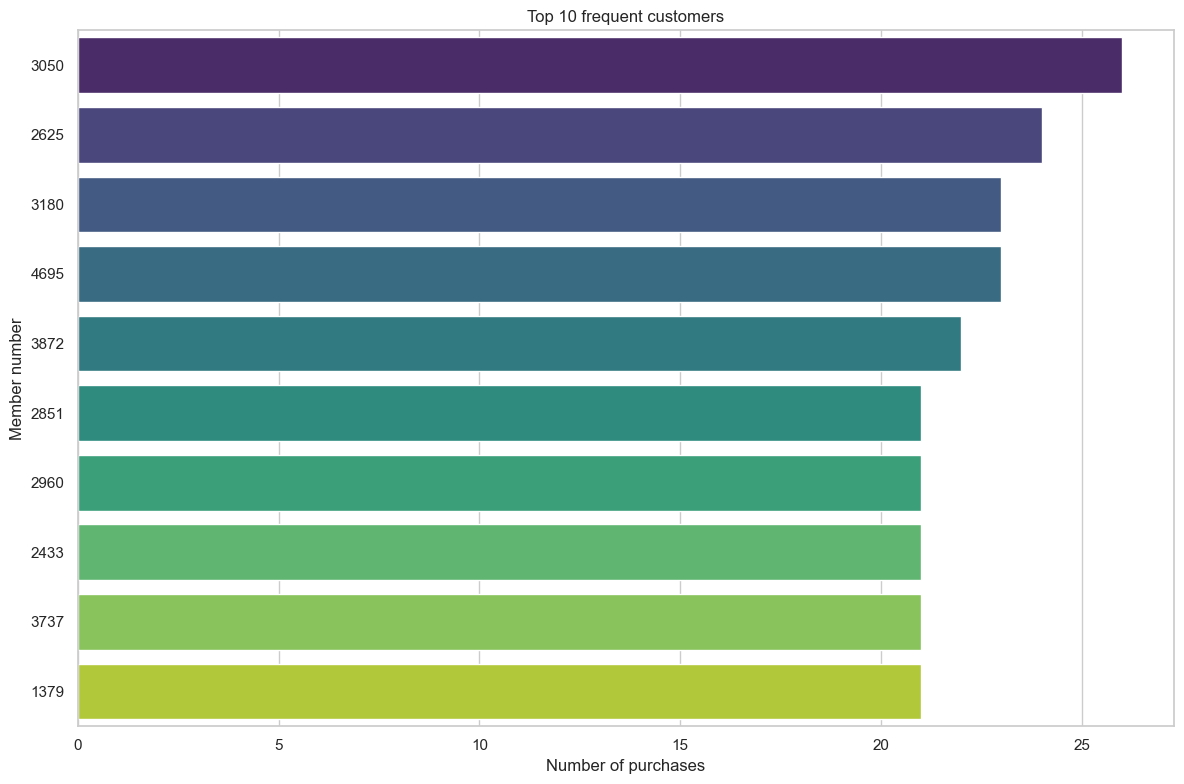

In [41]:
sales_count = data['Member_number'].apply(lambda x: str(x)).value_counts().reset_index()[:10]
sales_count.columns = ['Member_number', 'count']

sns.set(style="whitegrid")


plt.figure(figsize=(12,8))
sns.barplot(y='Member_number', x='count', data=sales_count, palette='viridis')
plt.title('Top 10 frequent customers')
plt.xlabel('Number of purchases')
plt.ylabel('Member number')
plt.tight_layout()
plt.savefig("top_customer.png")
plt.show()

C:\Users\ebube\AppData\Local\Temp\ipykernel_8092\2162360578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='itemDescription', x='count', data=sales_count, palette='viridis')


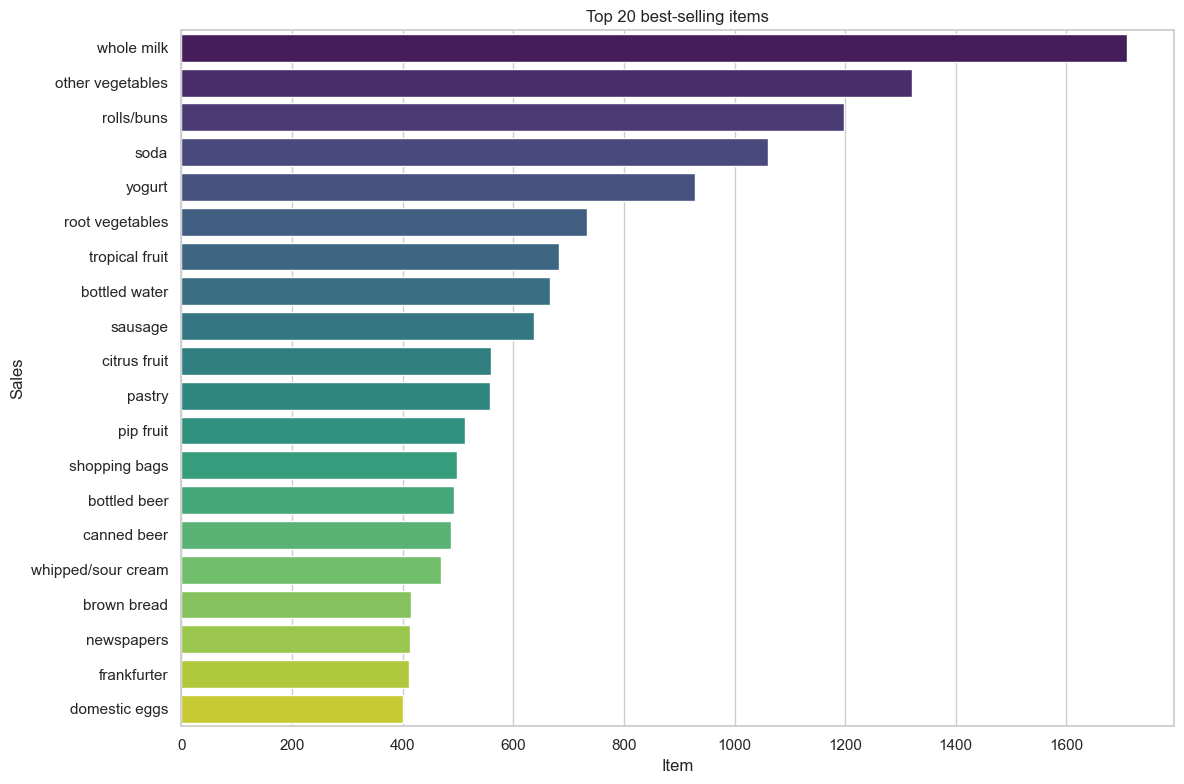

In [42]:
sales_count = data['itemDescription'].value_counts().reset_index()[:20]
sales_count.columns = ['itemDescription', 'count']


sns.set(style="whitegrid")

# 绘制直方图
plt.figure(figsize=(12,8))
sns.barplot(y='itemDescription', x='count', data=sales_count, palette='viridis')
plt.title('Top 20 best-selling items')
plt.xlabel('Item')
plt.ylabel('Sales')
plt.xticks()
plt.tight_layout()
plt.savefig('topsales.png', dpi=300)

plt.show()

C:\Users\ebube\AppData\Local\Temp\ipykernel_8092\2750937065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=monthly_counts_df, palette='viridis')


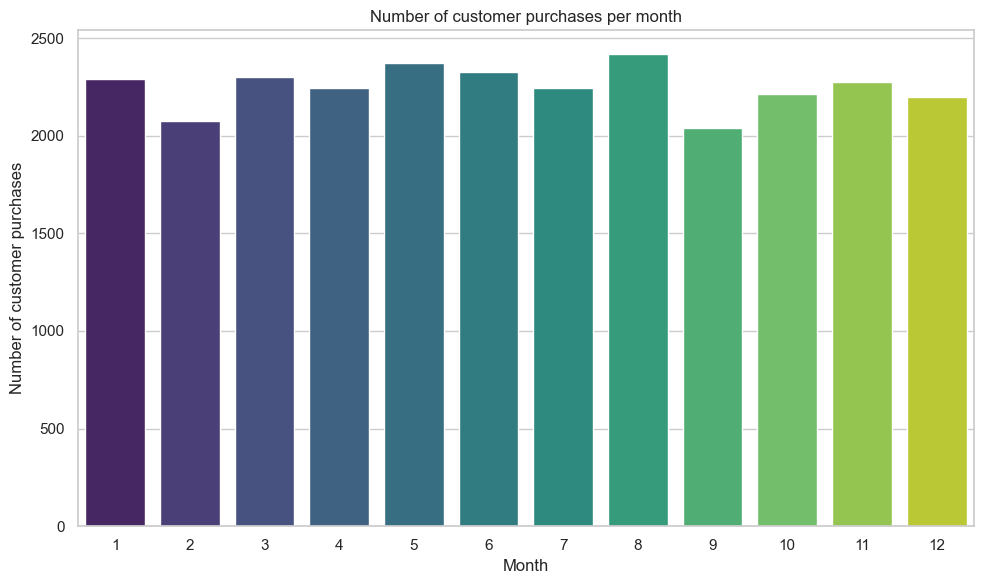

In [43]:
data['month'] = data['month'].astype(int)


monthly_counts = data['month'].value_counts().sort_index()

monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['month', 'count']

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x='month', y='count', data=monthly_counts_df, palette='viridis')
plt.title('Number of customer purchases per month')
plt.xlabel('Month')
plt.ylabel('Number of customer purchases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("monthly_counts.jpg",dpi=300)
plt.show()

In [44]:
basket_sets = basket['itemDescription'].str.get_dummies(sep=', ')

In [45]:
basket_sets

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data = pd.read_csv('Groceries data test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11765 entries, 0 to 11764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    11765 non-null  int64 
 1   Date             11765 non-null  object
 2   itemDescription  11765 non-null  object
 3   year             11765 non-null  int64 
 4   month            11765 non-null  int64 
 5   day              11765 non-null  int64 
 6   day_of_week      11765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 643.5+ KB
